# Оценки качества


**Качество** - совокупность характеристик объекта, определяющих его способности удовлетворять определенные потребности в соответствии с назначением.


In [1]:
%pylab inline

import re
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
u = 'http://uskor.stireac.com/result.tsv/slepova.tamara%40mail.ru/178.155.4.92__3219165950000190320'
# u = 'm__178.155.4.92__3219165950000190320.tsv'

M = pd.read_table(u)
M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       1041 non-null   float64
 1   v       1041 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 16.4 KB


Подготовим необходимые сведения.


In [3]:
scancode_hand = {70:'L', 74:'R'}
hand_color = {'L':cm.tab20(0), 'R':cm.tab20(4)}

Найдем моменты начала всех этапов, которые кодируются от 1001 до 1006.

In [4]:
ttetap = M.t[(M.v>1000)&((M.v<=1006))].tolist()
ttetap

[161.995, 188.13, 209.428, 225.12900000000002, 240.669, 266.44599999999997]

Соберем информацию по отдельным нажатиям.

In [17]:
tab, tad = ttetap[0], ttetap[1]
R = M[(M.t>=tab)&(M.t<tad)].copy()
R.v.value_counts()

 74       94
-74       94
 1001      1
 8888      1
 13        1
-13        1
 16384     1
Name: v, dtype: int64

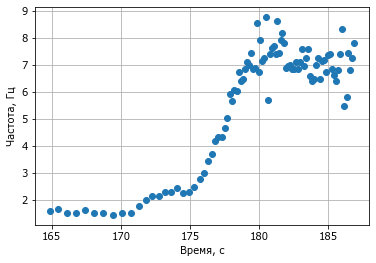

In [18]:
tt = R[R.v.isin([70,74])].t
iri = tt.diff()
plot(tt, 1/iri, 'o');
grid(True)
xlabel('Время, с')
ylabel('Частота, Гц');